In [1]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.options.display.max_colwidth = 100

In [4]:
df = pd.read_csv('compounds.csv',header = None)

In [5]:
view_stats = df.iloc[0,:]

In [6]:
print("so we have " + str(view_stats[0]) +" view counts, "+str(view_stats[1])+" likes, "+str(view_stats[2])+" dislikes. ")

so we have Thanks to everyone for your lovely comments ❤️We are a family now. 😎 view counts, 0.7717 likes, 1 dislikes. 


In [7]:
import chart_studio.plotly as py
import plotly.graph_objs as go

labels = ['Likecout','Dislikecount']
values = [view_stats[1],view_stats[2]]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

KeyboardInterrupt: 

In [8]:
df = df.drop(index = 0)


In [9]:
df = df.rename(columns = {0:'text',1:'score',2:'likecount'})

In [10]:
df = df.reset_index(drop = True)

In [12]:
def Clean_Text(text):

    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"he's","he is ",text)
    text = re.sub(r"she's","she is ",text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    text = text.strip(' ')
    return text


<>:16: SyntaxWarning:

invalid escape sequence '\W'

<>:17: SyntaxWarning:

invalid escape sequence '\s'

<>:16: SyntaxWarning:

invalid escape sequence '\W'

<>:17: SyntaxWarning:

invalid escape sequence '\s'

/var/folders/8m/6kbfrpsj4y77jz7z9y_smv1c0000gn/T/ipykernel_39497/36657915.py:16: SyntaxWarning:

invalid escape sequence '\W'

/var/folders/8m/6kbfrpsj4y77jz7z9y_smv1c0000gn/T/ipykernel_39497/36657915.py:17: SyntaxWarning:

invalid escape sequence '\s'



In [13]:
df['clean_text'] = df['text'].map(lambda com:Clean_Text(com))

In [14]:
df.head(10)


,text,score,likecount,clean_text
0,wonderful voice \r\nI want can you sing a Oriya song for me on my lyrics 💚,0.6124,0,wonderful voice i want can you sing a oriya song for me on my lyrics
1,It is sooo gooooddddd... melodious voice ♥️♥️,0.0000,0,it is sooo gooooddddd melodious voice
2,😳😳😳,0.0000,0,
3,Wonderful work !,0.6114,0,wonderful work
4,Great singing🎼🎤🎧Audio Visual delight Dear Manan👆👌,0.8910,1,great singing audio visual delight dear manan
5,Bhut sundar 👌,0.0000,1,bhut sundar
6,👍👍👍,0.0000,1,
7,🌼,0.0000,1,
8,That's awesome effort ..,0.6249,1,that awesome effort
9,That's amazing !! Keep going,0.6580,1,that amazing keep going


So now since we have `cleaned text`, we are going to try use NLTK again to see the new score.

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sid
sid = sid()
df['clean_text_score'] = df['clean_text'].map(lambda com:sid.polarity_scores(com)['compound'])

In [16]:
df.head(3)

,text,score,likecount,clean_text,clean_text_score
0,wonderful voice \r\nI want can you sing a Oriya song for me on my lyrics 💚,0.6124,0,wonderful voice i want can you sing a oriya song for me on my lyrics,0.6124
1,It is sooo gooooddddd... melodious voice ♥️♥️,0.0000,0,it is sooo gooooddddd melodious voice,0.0000
2,😳😳😳,0.0000,0,,0.0000


In [17]:
overall_score = df['clean_text_score'].mean()  # Or you can use .sum() for the sum

print("Overall Sentiment Score:", overall_score)

Overall Sentiment Score: 0.36758263888888887


In [18]:
df_like_ranking = df.sort_values('likecount',ascending = False)

In [19]:
df_like_ranking.head(10)

,text,score,likecount,clean_text,clean_text_score
114,It's short but ÑïÇë \r\nJust a suggestion increase the no of lines 😇,0.0387,10,it short but ñïçë just a suggestion increase the no of lines,0.0387
79,"Keep it up dear, achieve more and more in life, may success always be yours. Stay blessed.Congra...",0.7430,8,keep it up dear achieve more and more in life may success always be yours stay blessed congrats ...,0.9274
127,congrats to the whole team!!\r\n🙌🙌🙌👌,0.6103,6,congrats to the whole team,0.5267
133,Amazing Biro ❤👌,0.5859,6,amazing biro,0.5859
109,Really happy for all of you... Keep going on and on.... My good wishes to you all🥰,0.8173,5,really happy for all of you keep going on and on my good wishes to you all,0.8173
115,"Such an amazing composition, keep going 👍🏻👍🏻",0.5859,4,such an amazing composition keep going,0.5859
52,You are great manan broo keep it uppp,0.6249,4,you are great manan broo keep it uppp,0.6249
41,❤️✨🌸,0.0000,4,,0.0000
76,Congratulations for your first song brother ❤️😘,0.5994,4,congratulations for your first song brother,0.5994
91,Bohut hard 🥰🥰🥰,-0.1027,4,bohut hard,-0.1027


In [20]:
df_like_ranking

,text,score,likecount,clean_text,clean_text_score
114,It's short but ÑïÇë \r\nJust a suggestion increase the no of lines 😇,0.0387,10,it short but ñïçë just a suggestion increase the no of lines,0.0387
79,"Keep it up dear, achieve more and more in life, may success always be yours. Stay blessed.Congra...",0.7430,8,keep it up dear achieve more and more in life may success always be yours stay blessed congrats ...,0.9274
127,congrats to the whole team!!\r\n🙌🙌🙌👌,0.6103,6,congrats to the whole team,0.5267
133,Amazing Biro ❤👌,0.5859,6,amazing biro,0.5859
109,Really happy for all of you... Keep going on and on.... My good wishes to you all🥰,0.8173,5,really happy for all of you keep going on and on my good wishes to you all,0.8173
...,...,...,...,...,...
87,All the best .keep going. Many more to come,0.6369,1,all the best keep going many more to come,0.6369
1,It is sooo gooooddddd... melodious voice ♥️♥️,0.0000,0,it is sooo gooooddddd melodious voice,0.0000
3,Wonderful work !,0.6114,0,wonderful work,0.5719
2,😳😳😳,0.0000,0,,0.0000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              144 non-null    object 
 1   score             144 non-null    float64
 2   likecount         144 non-null    int64  
 3   clean_text        144 non-null    object 
 4   clean_text_score  144 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.8+ KB


In [21]:
def pick_up_comments(data,score,threshold):
    if score > 0:
        df =  data.loc[(df_like_ranking["clean_text_score"] >= score) & (df_like_ranking["likecount"] >= threshold)].sort_values(['likecount', 'score'],ascending=[False, False])
        return df
    elif score <= 0:
        df =  data.loc[(df_like_ranking["clean_text_score"] <= score) & (df_like_ranking["likecount"] >= threshold)].sort_values(['likecount', 'score'],ascending=[False, True])
        return df
              

----

In [22]:
pick_up_comments(df_like_ranking,0.8,50)

,text,score,likecount,clean_text,clean_text_score


In [23]:
pick_up_comments(df_like_ranking,-0.5,50)

,text,score,likecount,clean_text,clean_text_score


In [24]:
pick_up_comments(df_like_ranking,-0.4,50)

,text,score,likecount,clean_text,clean_text_score


In [25]:
pick_up_comments(df_like_ranking,-0.6,20)

,text,score,likecount,clean_text,clean_text_score


In [26]:
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 +  kurtosis(data) * (len(data)/6.)** 0.5))

<Axes: >

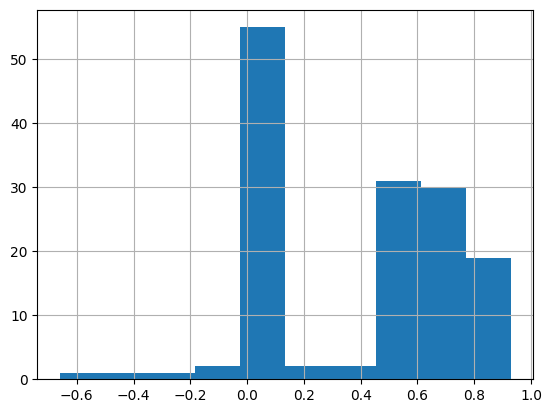

In [27]:
df_like_ranking.clean_text_score.hist()

# Histogram of the score

In [28]:
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 +  kurtosis(data) * (len(data)/6.)** 0.5))

<Axes: >

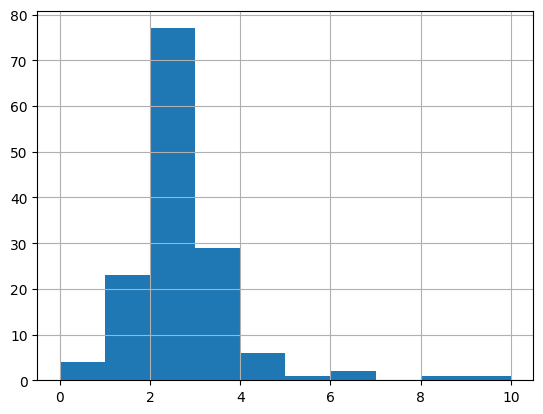

In [29]:
df_like_ranking.likecount.hist(bins = doanes(df_like_ranking["likecount"]))

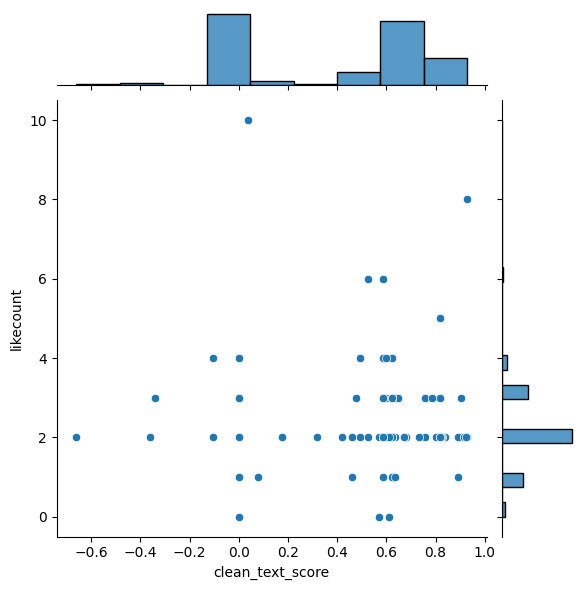

In [105]:
sns.jointplot(x="clean_text_score", y="likecount", data=df_like_ranking)